In [1]:
# Import libraries and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv('Housing.csv')
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())

Dataset shape: (545, 13)
Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Preprocess the dataset

In [5]:
# Encode categorical variables (yes/no and furnishingstatus)
le = LabelEncoder()
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])  # yes/no to 1/0

# Encode furnishingstatus (furnished, semi-furnished, unfurnished)
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])  # furnished: 0, semi-furnished: 1, unfurnished: 2

# Target: price
# Features: all other columns
X = df.drop(columns=['price'])
y = df['price']

# Check for missing values
print("Missing values in X:\n", X.isna().sum())
print("Missing values in y:", y.isna().sum())

# Ensure all features are numeric
print("X dtypes:\n", X.dtypes)

Missing values in X:
 area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
Missing values in y: 0
X dtypes:
 area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object


### Split data into train-test sets


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (436, 12) (436,)
Test set shape: (109, 12) (109,)


### Simple Linear Regression using area (Model Training)

In [7]:
# Select single feature
X_train_simple = X_train[['area']]
X_test_simple = X_test[['area']]

# Fit model
simple_lr = LinearRegression()
simple_lr.fit(X_train_simple, y_train)

# Predict
y_pred_simple = simple_lr.predict(X_test_simple)

# Evaluate
mae_simple = mean_absolute_error(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("Simple Linear Regression (Area -> Price):")
print(f"MAE: {mae_simple:.2f}")
print(f"MSE: {mse_simple:.2f}")
print(f"R²: {r2_simple:.4f}")
print(f"Coefficient (Area): {simple_lr.coef_[0]:.2f}")
print(f"Intercept: {simple_lr.intercept_:.2f}")

Simple Linear Regression (Area -> Price):
MAE: 1474748.13
MSE: 3675286604768.19
R²: 0.2729
Coefficient (Area): 425.73
Intercept: 2512254.26


### Plot regression line for simple linear regression

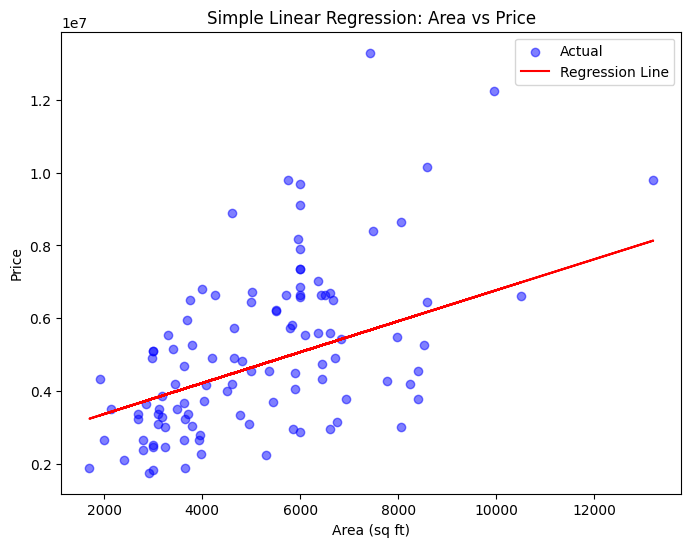

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_simple, y_test, color='blue', label='Actual', alpha=0.5)
plt.plot(X_test_simple, y_pred_simple, color='red', label='Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.savefig('simple_regression_line.png')
plt.show()

### Multiple Linear Regression using all features

In [9]:
multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)

# Predict
y_pred_multi = multi_lr.predict(X_test)

# Evaluate
mae_multi = mean_absolute_error(y_test, y_pred_multi)
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print("Multiple Linear Regression (All Features -> Price):")
print(f"MAE: {mae_multi:.2f}")
print(f"MSE: {mse_multi:.2f}")
print(f"R²: {r2_multi:.4f}")
print("\nCoefficients:")
for feature, coef in zip(X.columns, multi_lr.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {multi_lr.intercept_:.2f}")

Multiple Linear Regression (All Features -> Price):
MAE: 979679.69
MSE: 1771751116594.03
R²: 0.6495

Coefficients:
area: 235.85
bedrooms: 78574.49
bathrooms: 1097117.27
stories: 406223.16
mainroad: 366824.19
guestroom: 233146.77
basement: 393159.78
hotwaterheating: 687881.31
airconditioning: 785550.58
parking: 225756.51
prefarea: 629901.66
furnishingstatus: -210397.12
Intercept: 293083.07


### Plot predicted vs actual for multiple regression

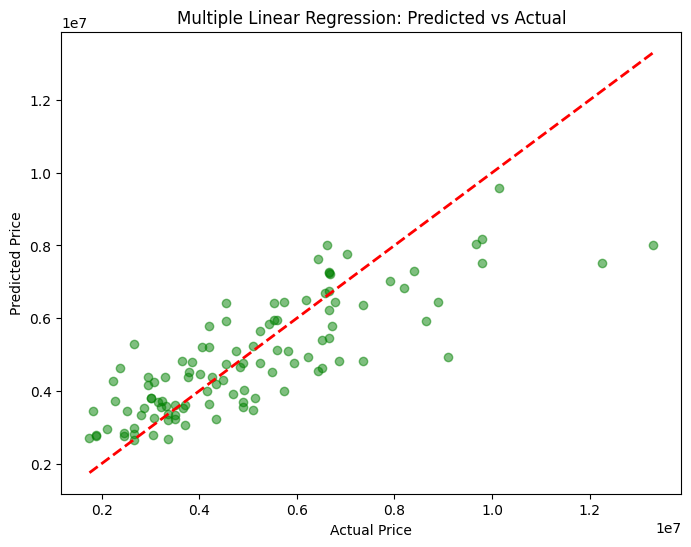

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_multi, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression: Predicted vs Actual')
plt.savefig('predicted_vs_actual.png')
plt.show()

### Check for multicollinearity using Variance Inflation Factor (VIF)

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF Scores:\n", vif_data)

VIF Scores:
              Feature        VIF
0               area   8.270130
1           bedrooms  16.368165
2          bathrooms   9.408363
3            stories   7.880723
4           mainroad   6.852485
5          guestroom   1.472838
6           basement   2.013876
7    hotwaterheating   1.089167
8    airconditioning   1.759717
9            parking   1.985880
10          prefarea   1.492621
11  furnishingstatus   2.648467
